# Mapillary data treatment

in this notebook the data from mapillary extraction saved in my raid partition have been exttracted saved and explored

one problem is that 47% of the data are NaN values due to the non presence of images in the mapillary website. need to find a way to handle those. could be interpolation from the neighbours or stuff like that 

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
folder_path = "/mnt/raid/matteo/Output_csv_mapillary_segmentation"

# Get all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]

# Read and concatenate all CSVs
df_list = []
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    try:
        df = pd.read_csv(file_path)
        df_list.append(df)
    except Exception as e:
        print(f"Error reading {file}: {e}")


In [3]:
# Merge all into one dataframe
mapillary_df = pd.concat(df_list, ignore_index=True)
mapillary_df.head()

# Save the final merged file
output_path = os.path.join("/home/s232713/data/Mapillary/grid_mapillary.csv")
mapillary_df.to_csv(output_path, index=False)


In [4]:
print('total number of rows:', len(mapillary_df))

nan_rows = mapillary_df[mapillary_df.isna().any(axis=1)] # couldnt download images for these rows
# print(nan_rows[:10])
n_nan_rows = len(nan_rows)

print('number of rows with NaN values:', n_nan_rows)

mapillary_cleaned_df = mapillary_df[~mapillary_df.drop(columns=['GRID_ID']).isna().all(axis=1)] # drop rows with NaN values in all columns except 'GRID_ID'

print('total number of rows after dropping NaN:', len(mapillary_cleaned_df))
print('percentage of rows with NaN values:', n_nan_rows/len(mapillary_df)*100, '%')

total number of rows: 12917
number of rows with NaN values: 3686
total number of rows after dropping NaN: 9231
percentage of rows with NaN values: 28.536037779670202 %


the value of NaN values is this hugh becuase when considering a big area like i did there are no images in some hexagons 

In [5]:
mapillary_df.columns

Index(['Motorcyclist', 'Truck', 'Motorcycle', 'Terrain', 'Car', 'Person',
       'Vegetation', 'Building', 'On Rails', 'Traffic Light', 'Fence',
       'Traffic Sign (Front)', 'Road', 'Sidewalk', 'Manhole', 'Wall',
       'Utility Pole', 'Sky', 'Pole', 'Bicyclist', 'Bus',
       'Lane Marking - General', 'Other Rider', 'Curb', 'Bicycle', 'GRID_ID'],
      dtype='object')

In [6]:
mapillary_df.head()

Motorcyclist     Truck  Motorcycle   Terrain       Car    Person  \
0       0.00000  0.030174    0.000000  1.159452  3.356234  0.064634   
1       0.00042  0.250365    0.018107  0.081002  2.545716  0.221798   
2           NaN       NaN         NaN       NaN       NaN       NaN   
3       0.00000  0.113678    0.025819  0.164413  8.510234  0.031611   
4       0.00000  0.786807    0.038198  0.705083  2.613131  0.148443   

   Vegetation   Building  On Rails  Traffic Light  ...  Utility Pole  \
0   10.704587   1.888555       0.0       0.286115  ...      0.163167   
1    2.422580  38.010905       0.0       0.015882  ...      0.002155   
2         NaN        NaN       NaN            NaN  ...           NaN   
3   11.131757  17.236811       0.0       0.000916  ...      0.004927   
4   21.693764   5.004438       0.0       0.025202  ...      0.294647   

         Sky      Pole  Bicyclist       Bus  Lane Marking - General  \
0  49.250018  0.797246   0.018832  0.025635                1.309319   
1  19.312143  0.094821   0.186717  0.004330                2.162898   
2        NaN       NaN        NaN       NaN                     NaN   
3  27.938341  0.174370   1.400235  0.070438                0.093009   
4  29.094416  0.228945   0.082436  0.184364                3.075714   

   Other Rider      Curb   Bicycle   GRID_ID  
0          0.0  4.237010  0.009905  256098.0  
1          0.0  4.727185  0.724594  265921.0  
2          NaN       NaN       NaN  170033.0  
3          0.0  2.752349  0.673269  269202.0  
4          0.0  2.109197  0.034930  287615.0  

[5 rows x 26 columns]

In [7]:
mapillary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12917 entries, 0 to 12916
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Motorcyclist            9231 non-null   float64
 1   Truck                   9231 non-null   float64
 2   Motorcycle              9231 non-null   float64
 3   Terrain                 9231 non-null   float64
 4   Car                     9231 non-null   float64
 5   Person                  9231 non-null   float64
 6   Vegetation              9231 non-null   float64
 7   Building                9231 non-null   float64
 8   On Rails                9231 non-null   float64
 9   Traffic Light           9231 non-null   float64
 10  Fence                   9231 non-null   float64
 11  Traffic Sign (Front)    9231 non-null   float64
 12  Road                    9231 non-null   float64
 13  Sidewalk                9231 non-null   float64
 14  Manhole                 9231 non-null 

In [8]:
image_col = ['Vegetation', 'Wall', 'Other Rider', 'Traffic Sign (Front)',
            'Motorcycle', 'Bus', 'Person', 'Building', 'Road', 'Curb',
            'Utility Pole', 'Bicyclist', 'Bicycle', 'Truck', 'Manhole', 'Pole',
            'Motorcyclist', 'Traffic Light', 'On Rails', 'Terrain',
            'Lane Marking - General', 'Fence', 'Car', 'Sky', 'Sidewalk']

mapillary_df = mapillary_df.dropna(subset=image_col)

In [9]:
mapillary_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9231 entries, 0 to 12916
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Motorcyclist            9231 non-null   float64
 1   Truck                   9231 non-null   float64
 2   Motorcycle              9231 non-null   float64
 3   Terrain                 9231 non-null   float64
 4   Car                     9231 non-null   float64
 5   Person                  9231 non-null   float64
 6   Vegetation              9231 non-null   float64
 7   Building                9231 non-null   float64
 8   On Rails                9231 non-null   float64
 9   Traffic Light           9231 non-null   float64
 10  Fence                   9231 non-null   float64
 11  Traffic Sign (Front)    9231 non-null   float64
 12  Road                    9231 non-null   float64
 13  Sidewalk                9231 non-null   float64
 14  Manhole                 9231 non-null   floa

In [10]:
mapillary_df.to_csv("/home/s232713/data/Mapillary/grid_mapillary.csv", index=False)

# visualization

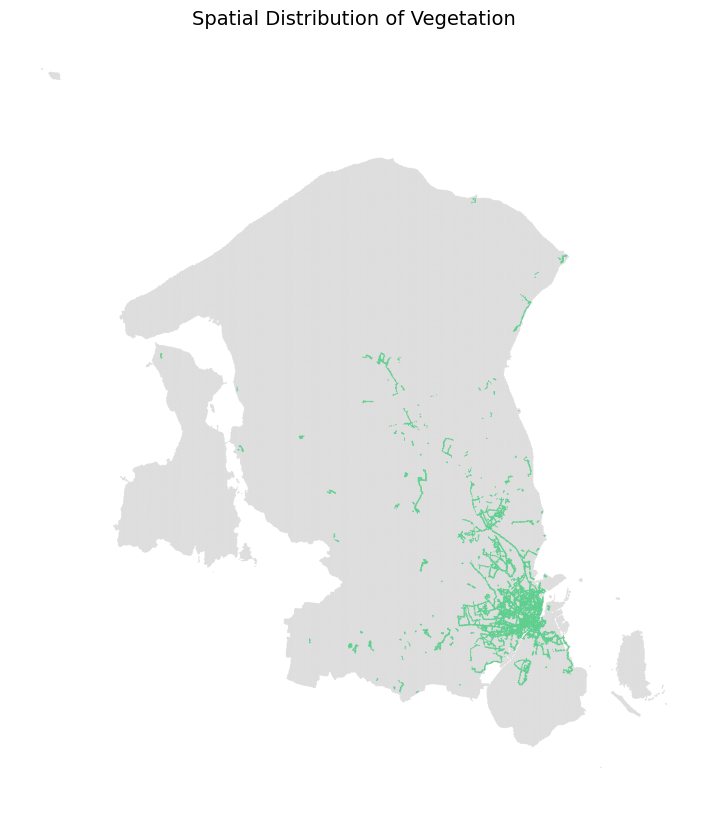

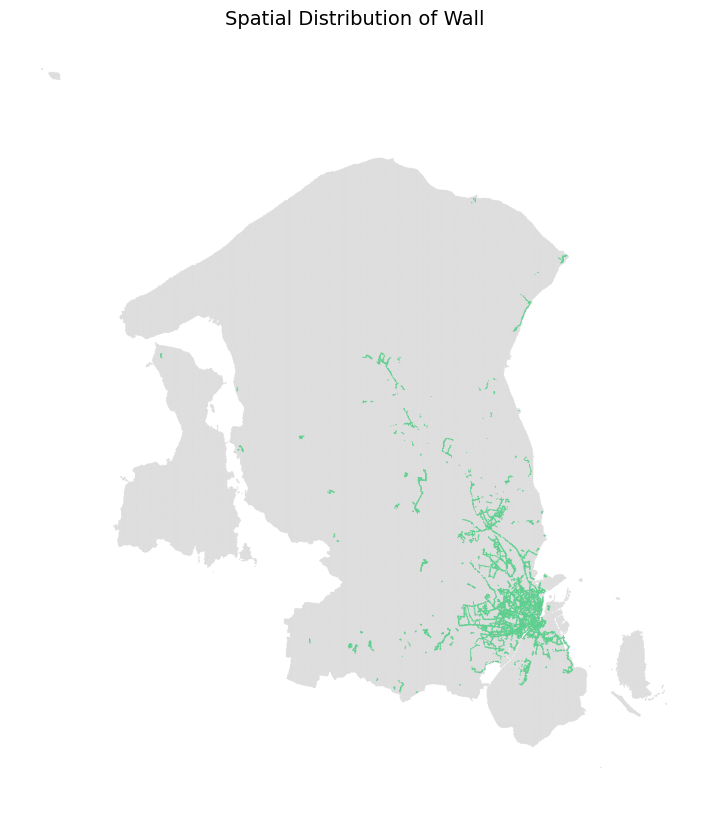

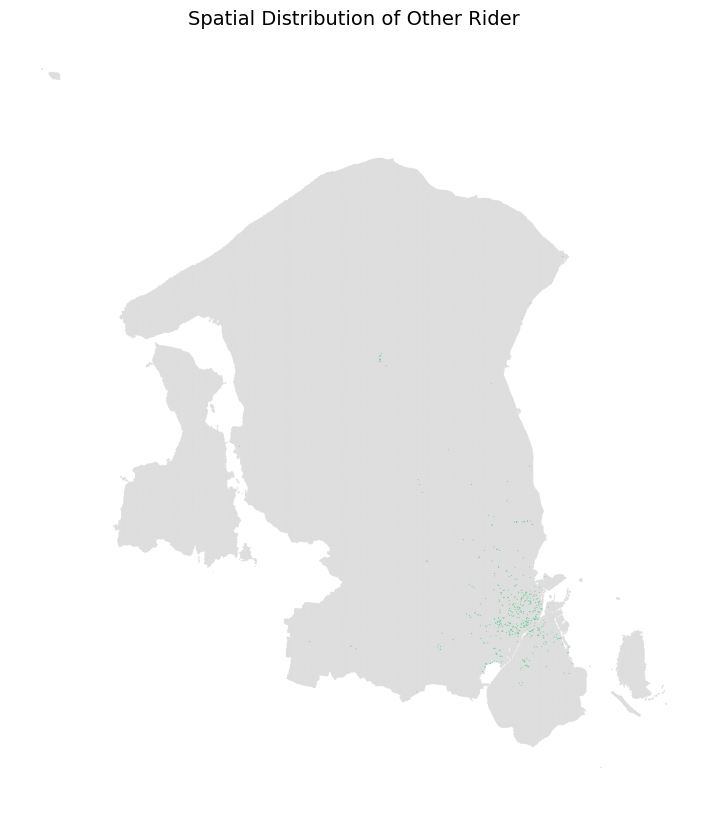

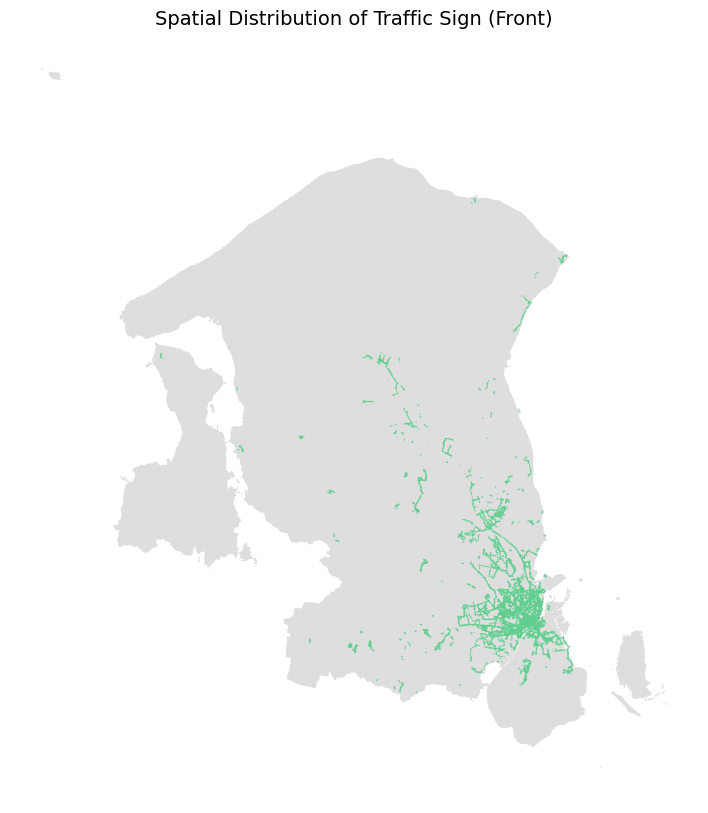

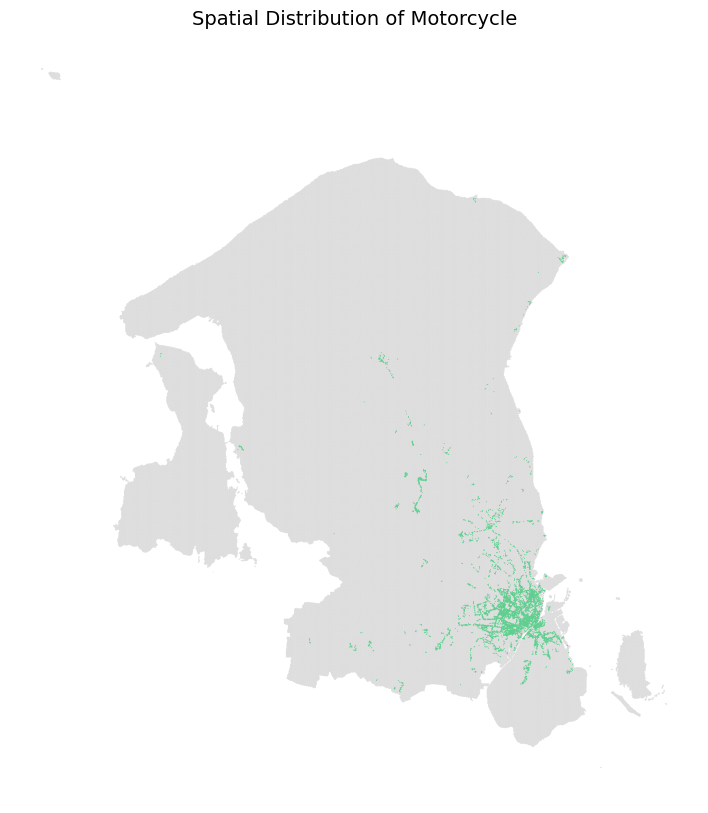

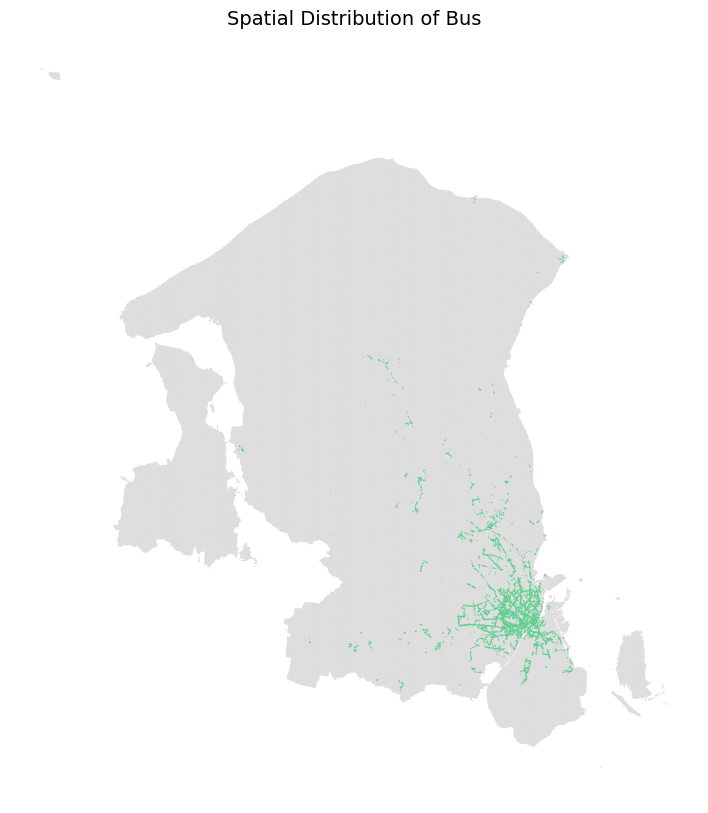

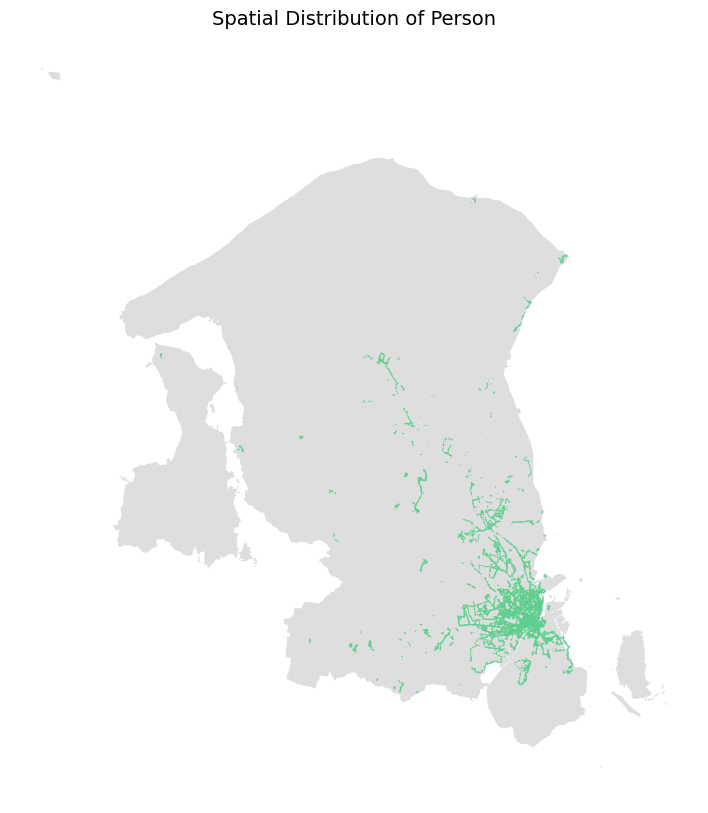

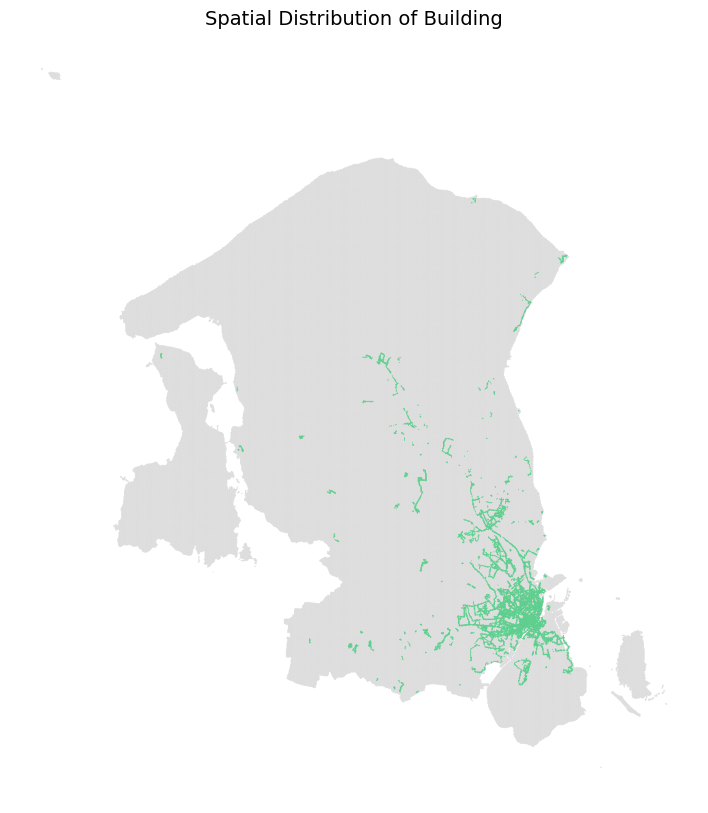

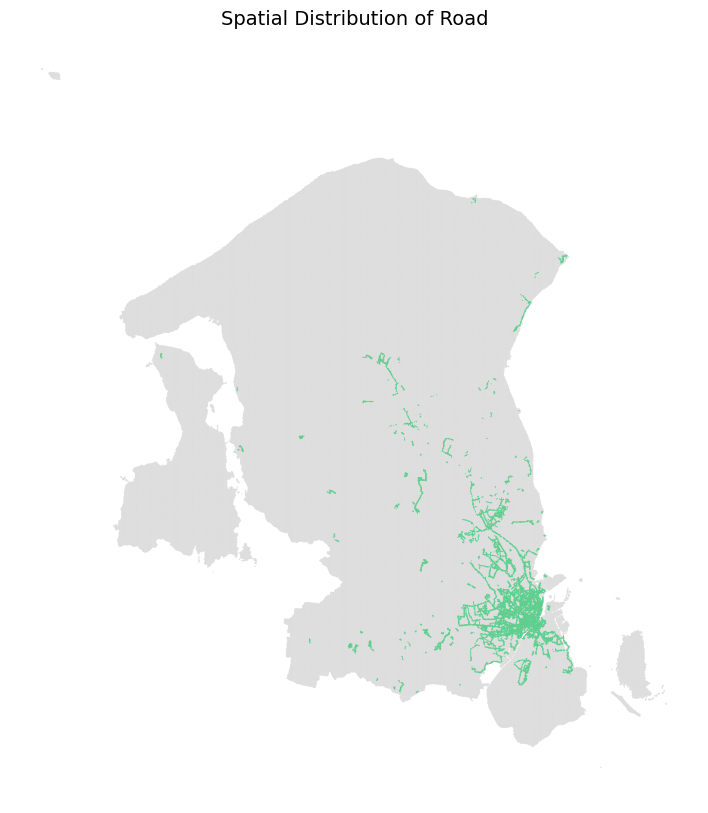

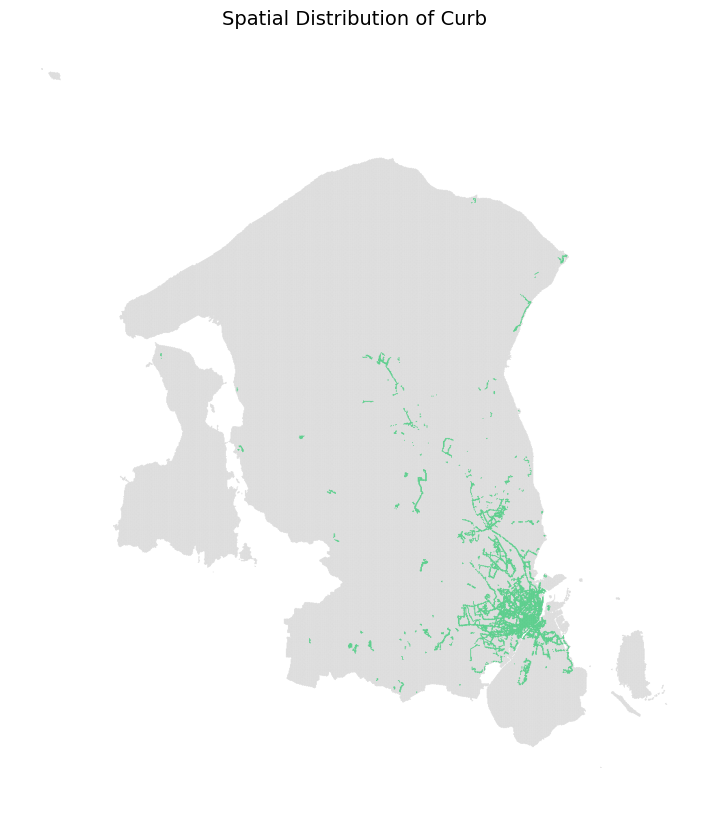

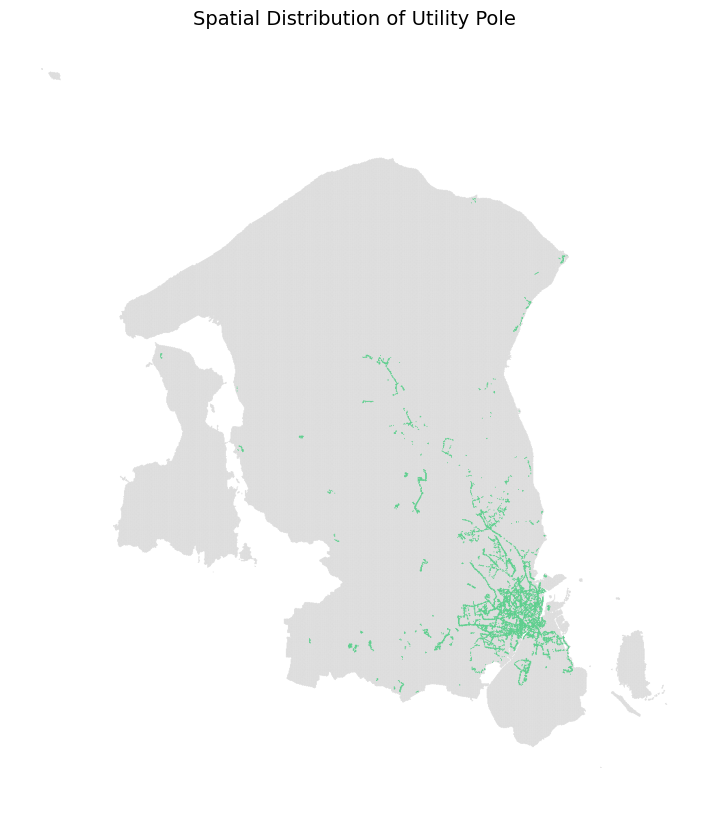

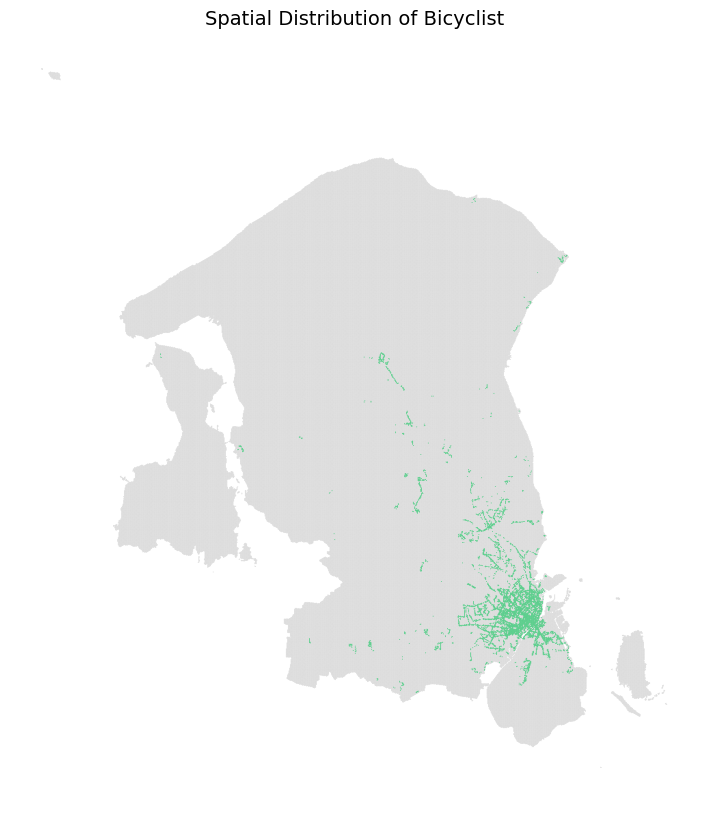

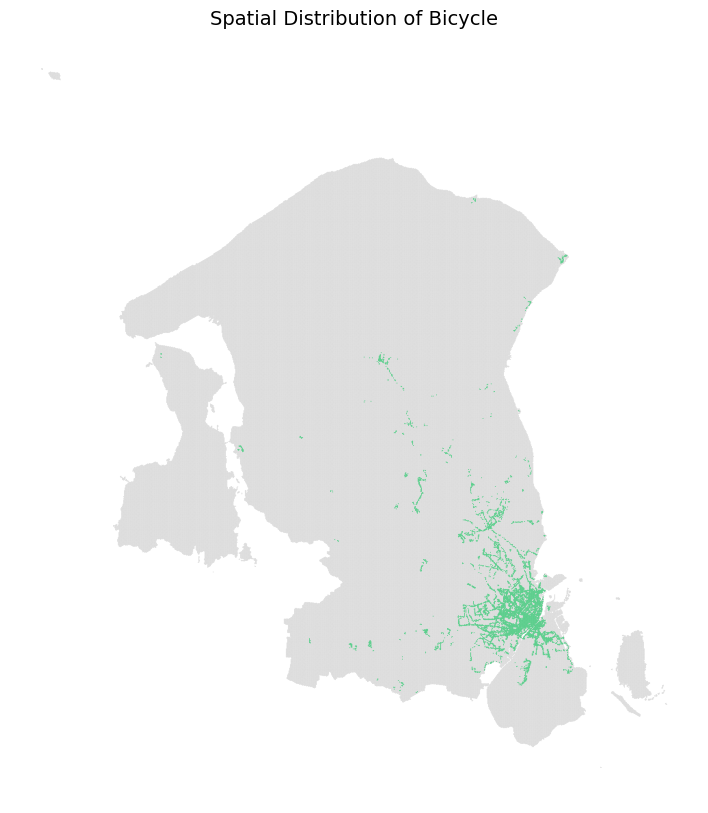

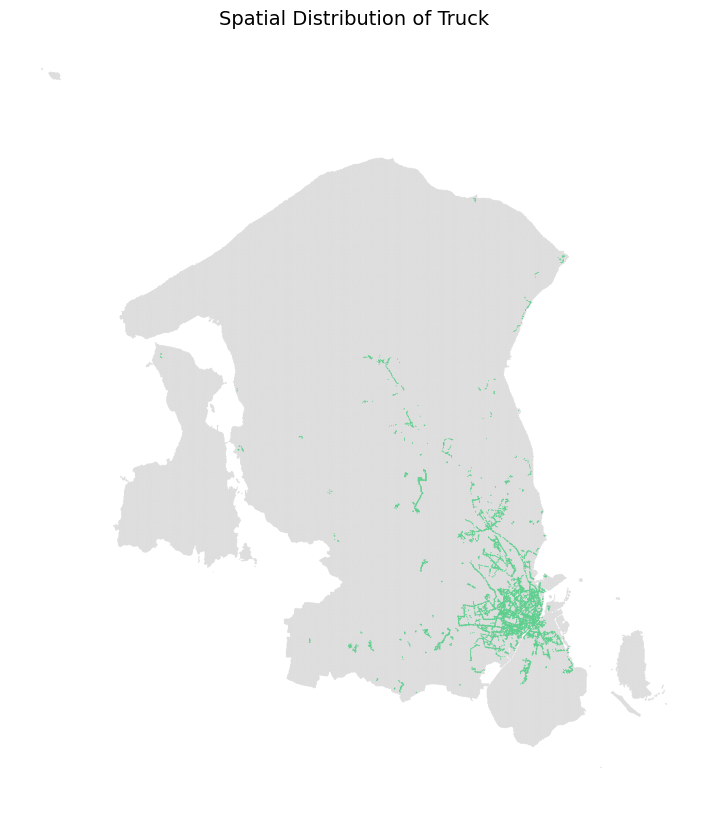

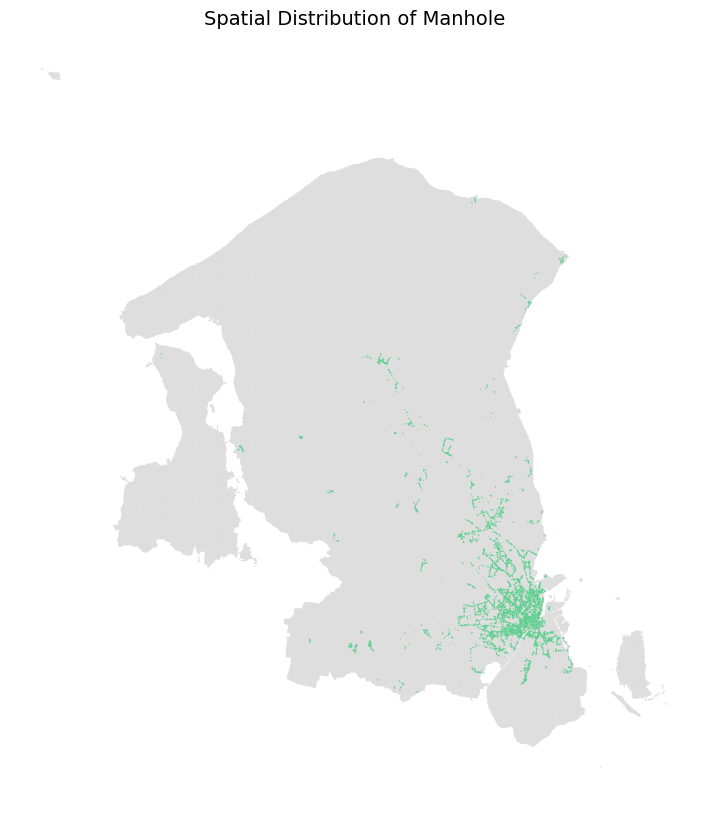

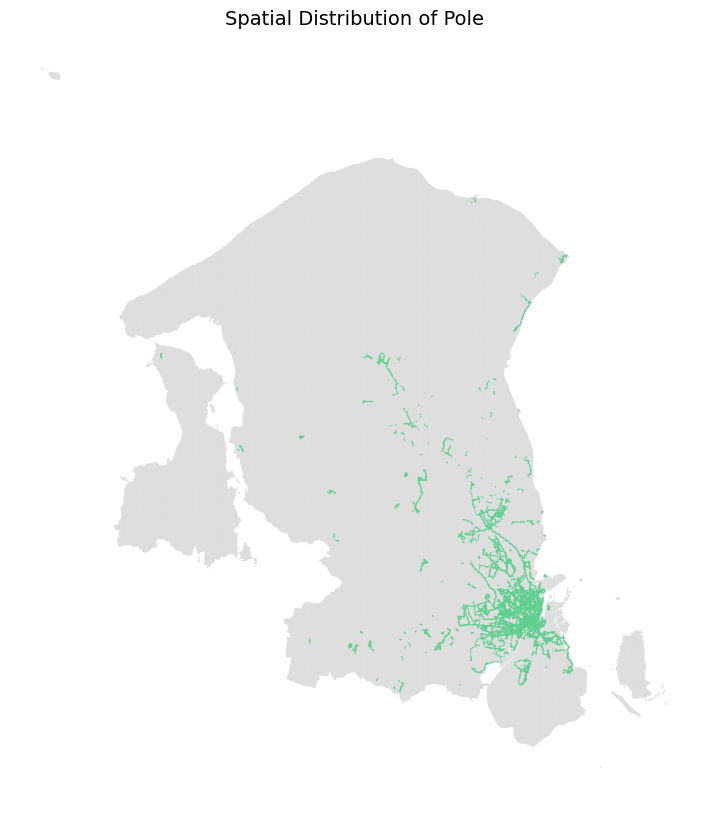

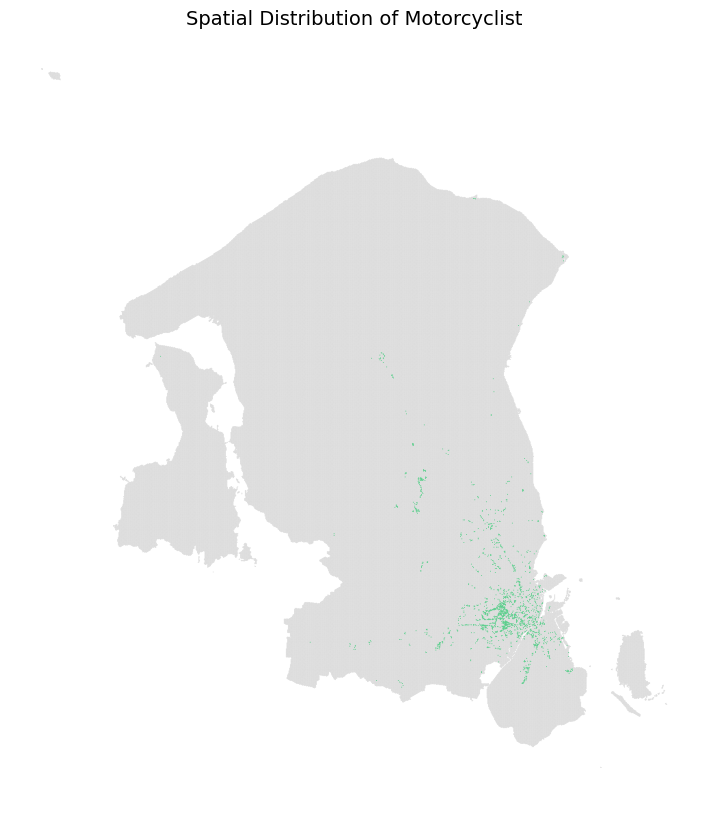

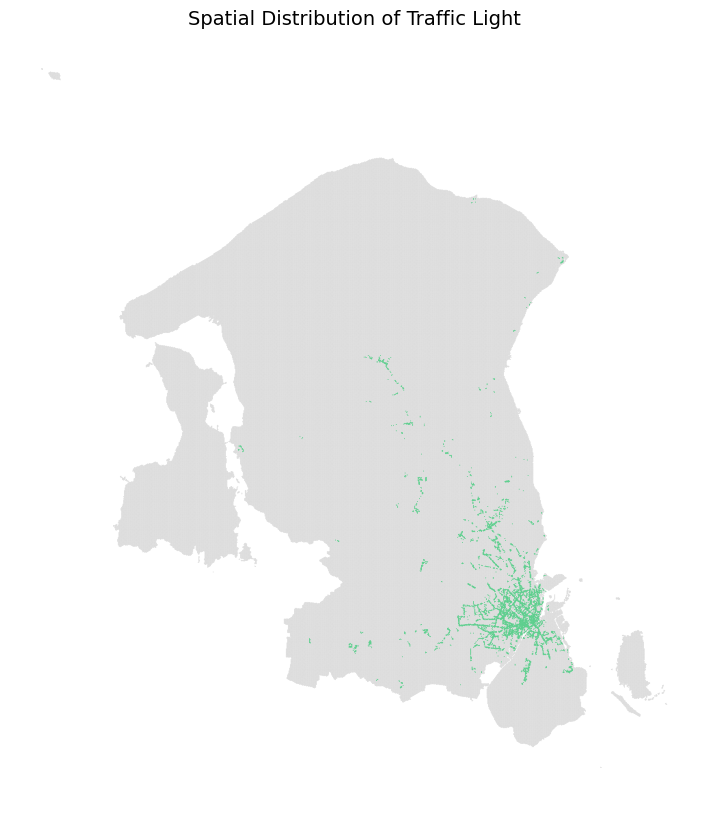

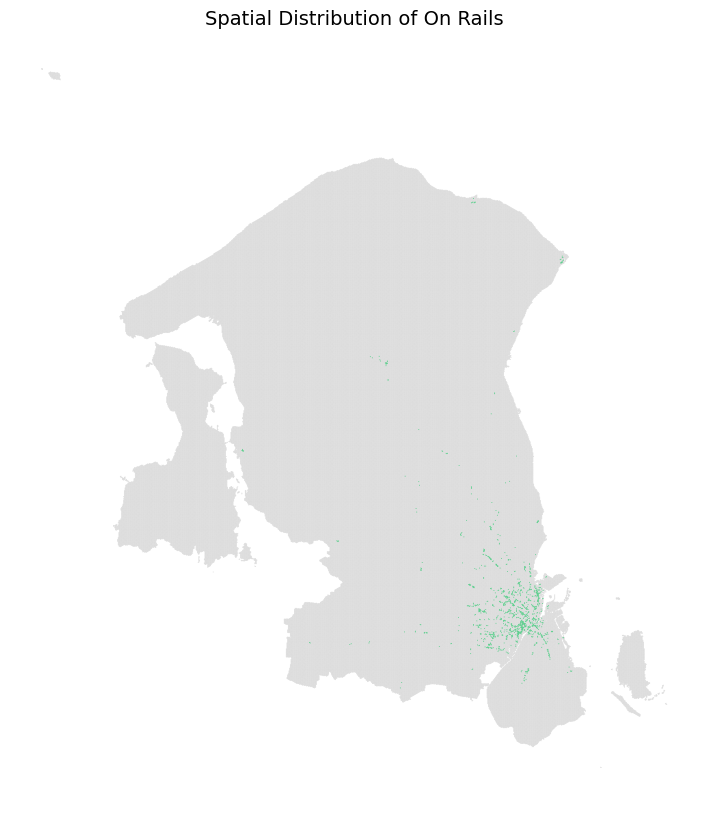

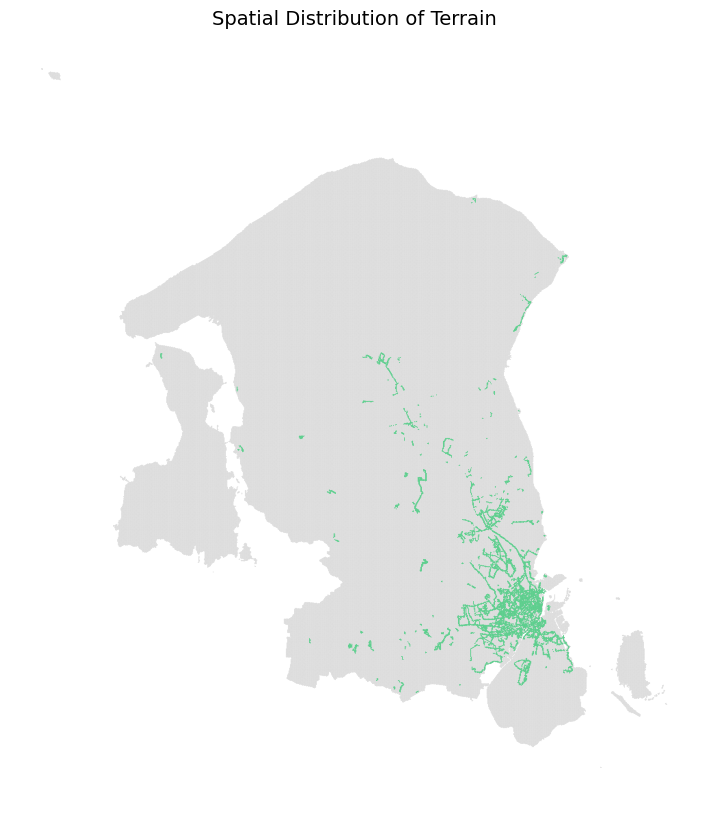

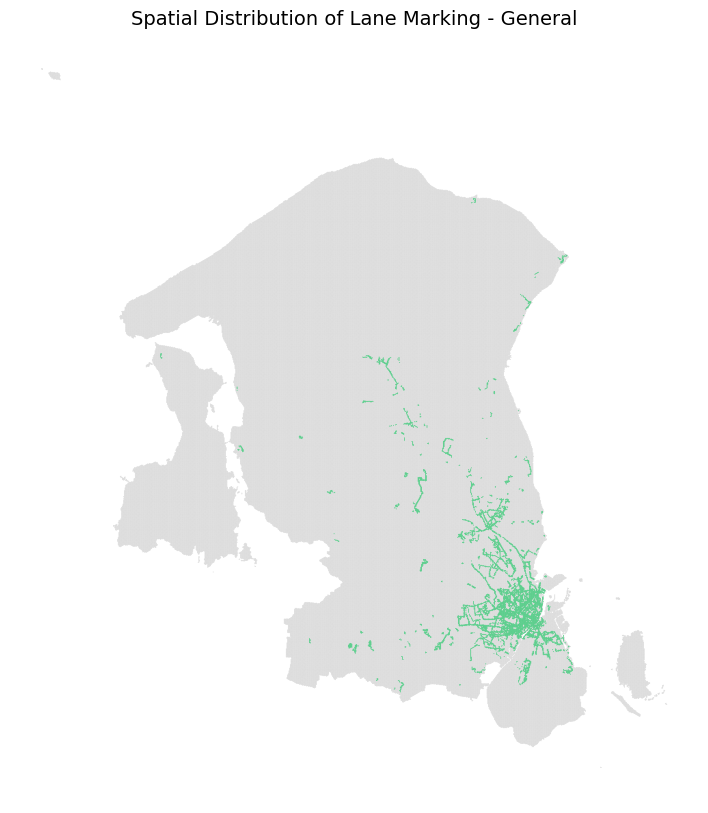

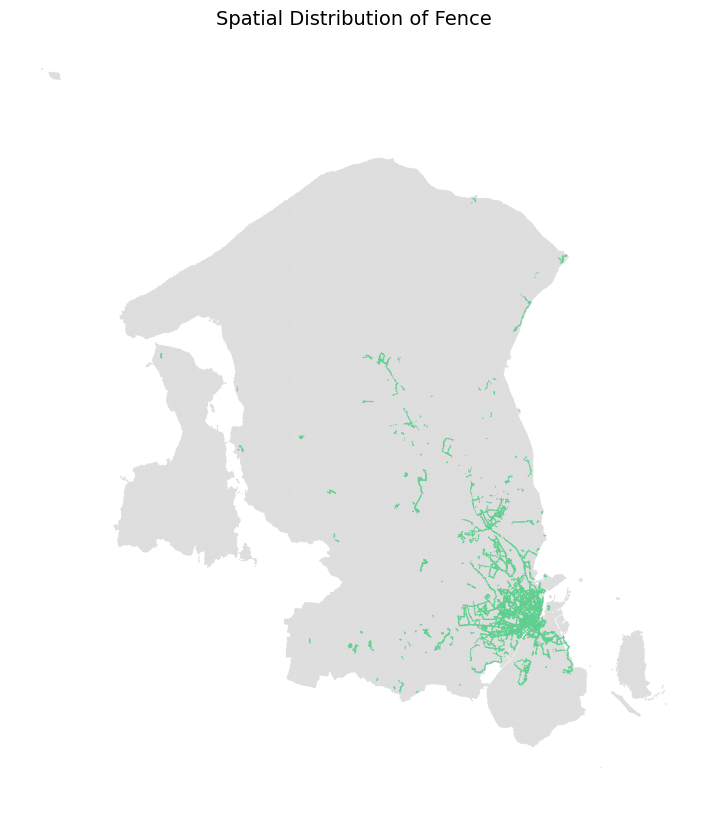

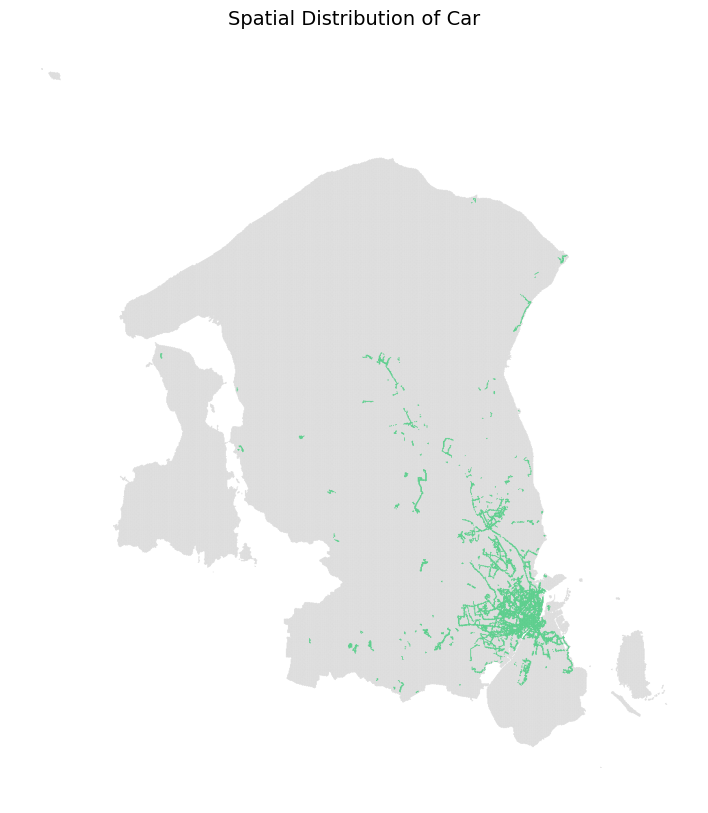

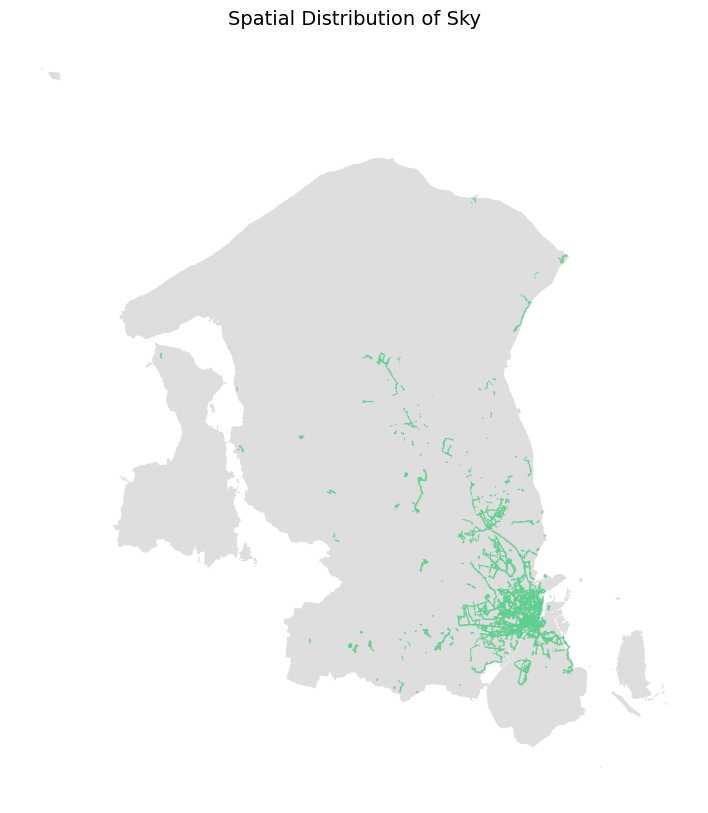

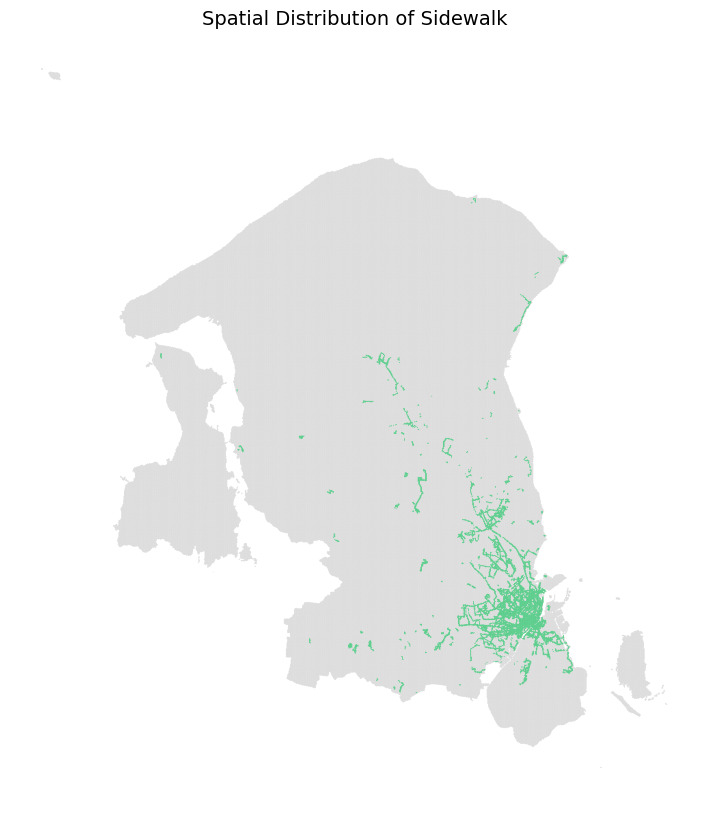

In [11]:
# plot the different types of features in the hex grid

grid_path = "/home/s232713/data/grid_data/cph_hexgrid.geojson" 
boundary_path = "/home/s232713/data/grid_data/copenhagen_union_boundary.geojson"

# === LOAD DATA ===
hex_gdf = gpd.read_file(grid_path)

# === SELECT FEATURE ===
features = ['Vegetation', 'Wall', 'Other Rider', 'Traffic Sign (Front)',
            'Motorcycle', 'Bus', 'Person', 'Building', 'Road', 'Curb',
            'Utility Pole', 'Bicyclist', 'Bicycle', 'Truck', 'Manhole', 'Pole',
            'Motorcyclist', 'Traffic Light', 'On Rails', 'Terrain',
            'Lane Marking - General', 'Fence', 'Car', 'Sky', 'Sidewalk']

for feature in features:
    # Flag cells where that feature exists (not NaN and >0)
    mapillary_df[f"{feature}_present"] = mapillary_df[feature].notna() & (mapillary_df[feature] > 0)

    # === MERGE MAPILLARY DATA INTO HEX GRID ===
    merged_gdf = hex_gdf.merge(
        mapillary_df[["GRID_ID", f"{feature}_present"]],
        on="GRID_ID",
        how="left"
    )

    # === PLOT ===
    fig, ax = plt.subplots(figsize=(10, 10))
    hex_gdf.plot(ax=ax, color="lightgrey", edgecolor="none")  # background
    merged_gdf[merged_gdf[f"{feature}_present"] == True].plot(ax=ax, color="#2ecc71", edgecolor="none")

    plt.title(f"Spatial Distribution of {feature}", fontsize=14)
    plt.axis("off")
    plt.show()

the plots looks similar to the one in the trajectories plot (in gps_buffer.ipynb)

In [2]:
import pandas as pd

df_mapillary = pd.read_csv("/home/s232713/data/Mapillary/grid_mapillary.csv")

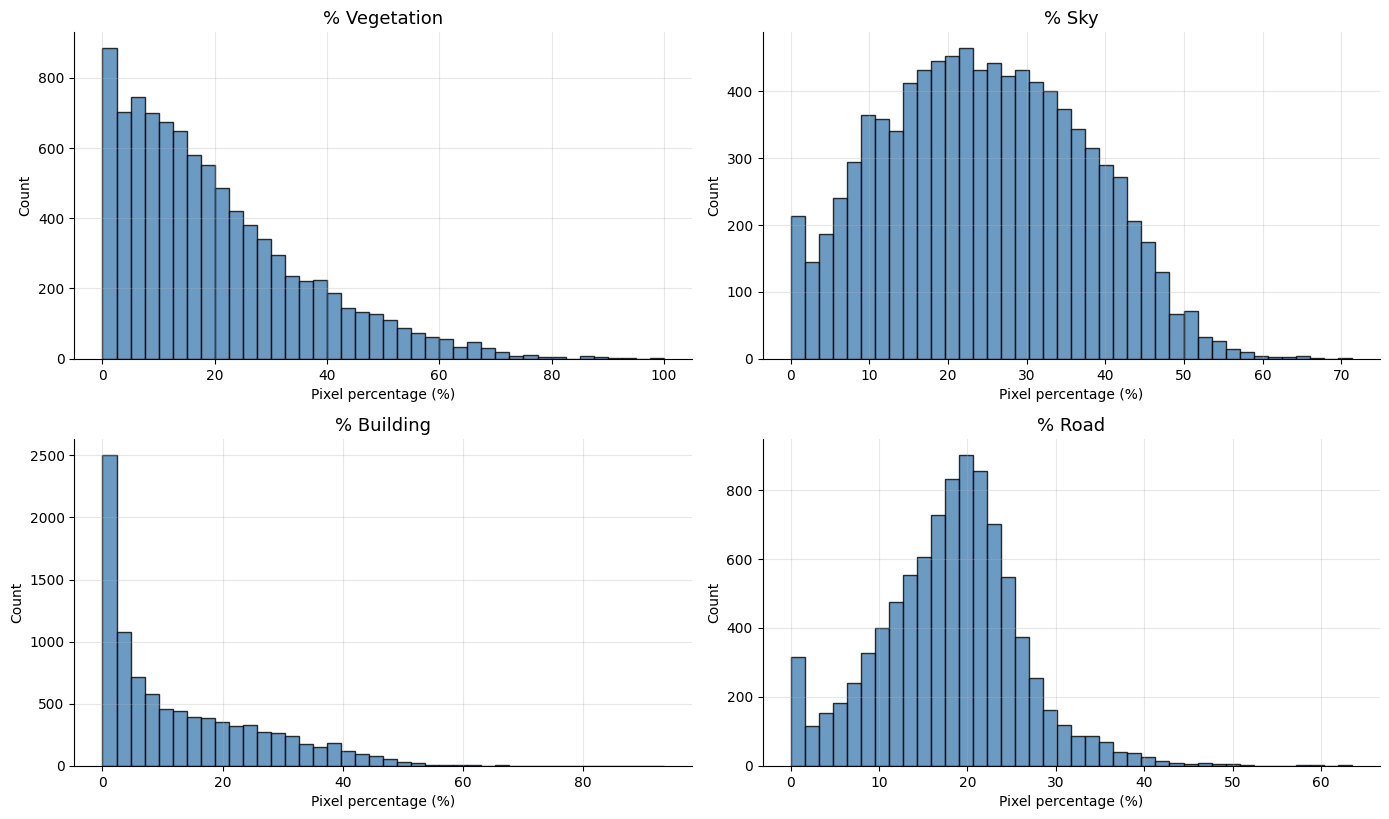

In [3]:
import matplotlib.pyplot as plt

core_features = [
    ("Vegetation", "% Vegetation"),
    ("Sky", "% Sky"),
    ("Building", "% Building"),
    ("Road", "% Road"),
]

fig, axes = plt.subplots(4, 2, figsize=(14, 16))
axes = axes.flatten()

for ax, (col, title) in zip(axes, core_features):
    ax.hist(df_mapillary[col].dropna(), bins=40, color="steelblue", edgecolor="black", alpha=0.8)
    ax.set_title(title, fontsize=13)
    ax.set_xlabel("Pixel percentage (%)")
    ax.set_ylabel("Count")
    ax.grid(True, alpha=0.3)
    ax.spines["top"].set_visible(False) 
    ax.spines["right"].set_visible(False)

# Remove leftover axes if any
for i in range(len(core_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


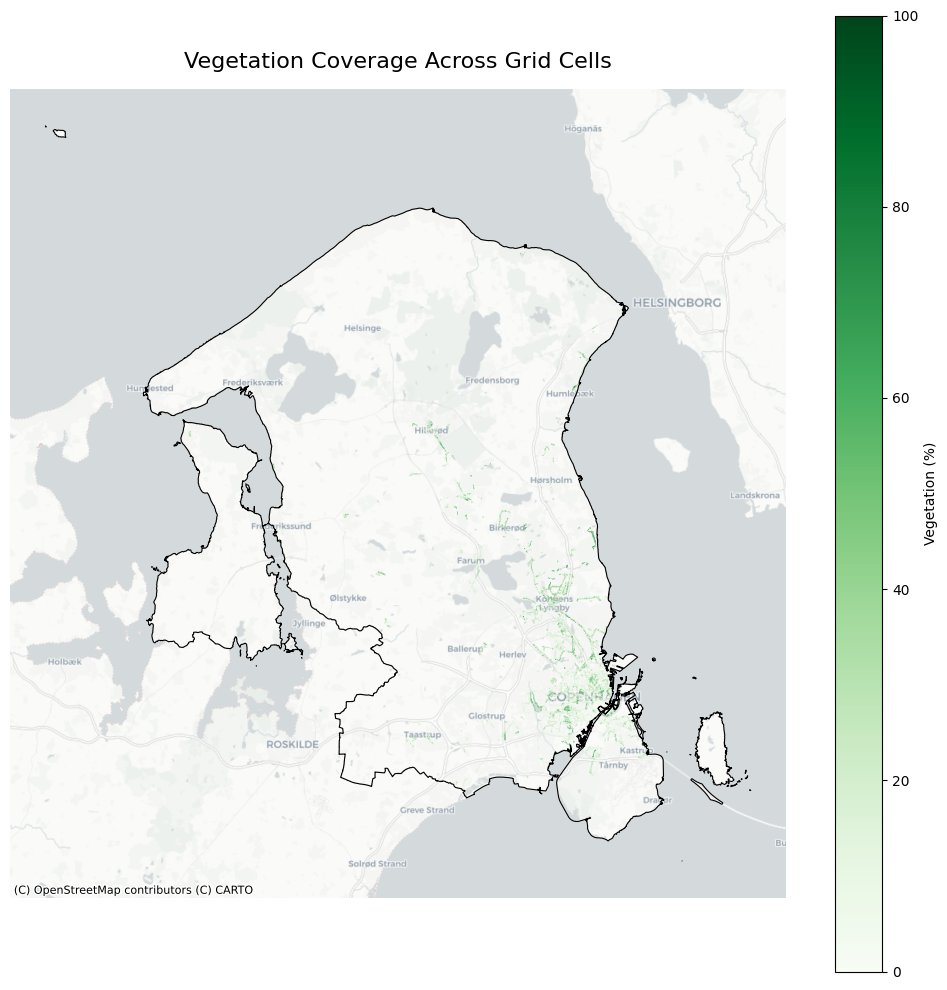

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import geopandas as gpd
import contextily as ctx

gdf_grid = gpd.read_file("/home/s232713/data/grid_data/cph_hexgrid.geojson")  
gdf_boundary = gpd.read_file("/home/s232713/data/grid_data/copenhagen_union_boundary.geojson")

# compute mean vegetation per grid cell
veg_map = df_mapillary.groupby("GRID_ID")["Vegetation"].mean().reset_index()
gdf_veg = gdf_grid.merge(veg_map, on="GRID_ID", how="left")

# Reproject geometries to Web Mercator
gdf_veg_3857 = gdf_veg.to_crs(epsg=3857)
gdf_boundary_3857 = gdf_boundary.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10, 10))
ax.axis("off")
ax.set_aspect("equal")

cmap = plt.cm.Greens
norm = mpl.colors.Normalize(vmin=gdf_veg["Vegetation"].min(), vmax=gdf_veg["Vegetation"].max())

gdf_veg_3857.plot(
    column="Vegetation",
    cmap=cmap,
    norm=norm,
    edgecolor="none",
    linewidth=0.3,
    ax=ax
)

# Add boundary outline on top
gdf_boundary_3857.boundary.plot(
    ax=ax,
    facecolor="none",
    color="black",
    linewidth=0.8
)

cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label("Vegetation (%)")

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron) # basemap of cph 

plt.title("Vegetation Coverage Across Grid Cells", fontsize=16, pad=15)
plt.tight_layout()
plt.show()


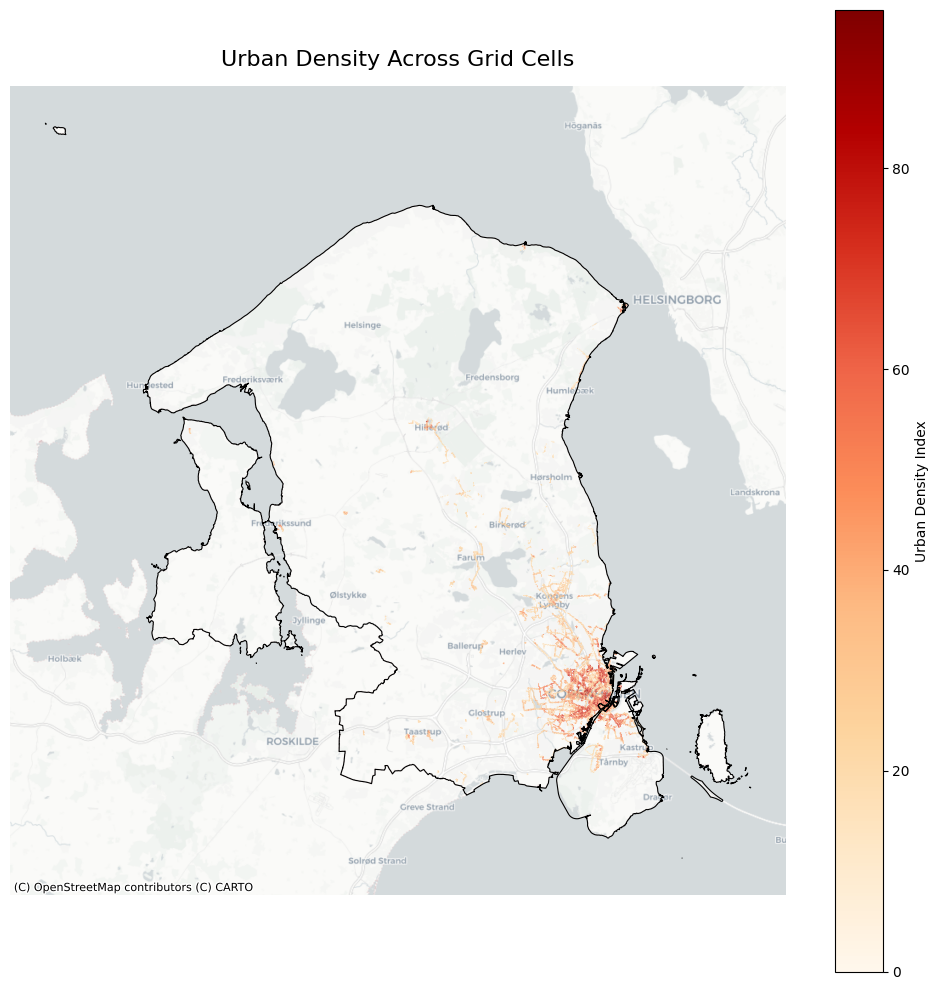

In [ ]:
# spatial map of urban density 
gdf_grid = gpd.read_file("/home/s232713/data/grid_data/cph_hexgrid.geojson")  
gdf_boundary = gpd.read_file("/home/s232713/data/grid_data/copenhagen_union_boundary.geojson")

df_mapillary["UrbanDensity"] = (
    df_mapillary["Building"] +
    df_mapillary["Road"] +
    df_mapillary["Sidewalk"] +
    df_mapillary["Car"] +
    df_mapillary["Person"]
)

density_map = df_mapillary.groupby("GRID_ID")["UrbanDensity"].mean().reset_index()
gdf_density = gdf_grid.merge(density_map, on="GRID_ID", how="left")

gdf_density_3857 = gdf_density.to_crs(epsg=3857)
gdf_boundary_3857 = gdf_boundary.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10, 10))
ax.axis("off")
ax.set_aspect("equal")

cmap = plt.cm.OrRd

norm = mpl.colors.Normalize(
    vmin=gdf_density["UrbanDensity"].min(),
    vmax=gdf_density["UrbanDensity"].max()
)

gdf_density_3857.plot(
    column="UrbanDensity",
    cmap=cmap,
    norm=norm,
    linewidth=0.3,
    edgecolor="none",
    ax=ax
)

gdf_boundary_3857.boundary.plot(
    ax=ax,
    facecolor="none",
    color="black",
    linewidth=0.8
)

cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label("Urban Density Index")

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron) # basemap of cph 

plt.title("Urban Density Across Grid Cells", fontsize=16, pad=15)
plt.tight_layout()
plt.show()

df_mapillary = df_mapillary.drop('UrbanDensity', axis=1)


In [ ]:
df_mapillary.columns


Index(['Motorcyclist', 'Truck', 'Motorcycle', 'Terrain', 'Car', 'Person',
       'Vegetation', 'Building', 'On Rails', 'Traffic Light', 'Fence',
       'Traffic Sign (Front)', 'Road', 'Sidewalk', 'Manhole', 'Wall',
       'Utility Pole', 'Sky', 'Pole', 'Bicyclist', 'Bus',
       'Lane Marking - General', 'Other Rider', 'Curb', 'Bicycle', 'GRID_ID'],
      dtype='object')

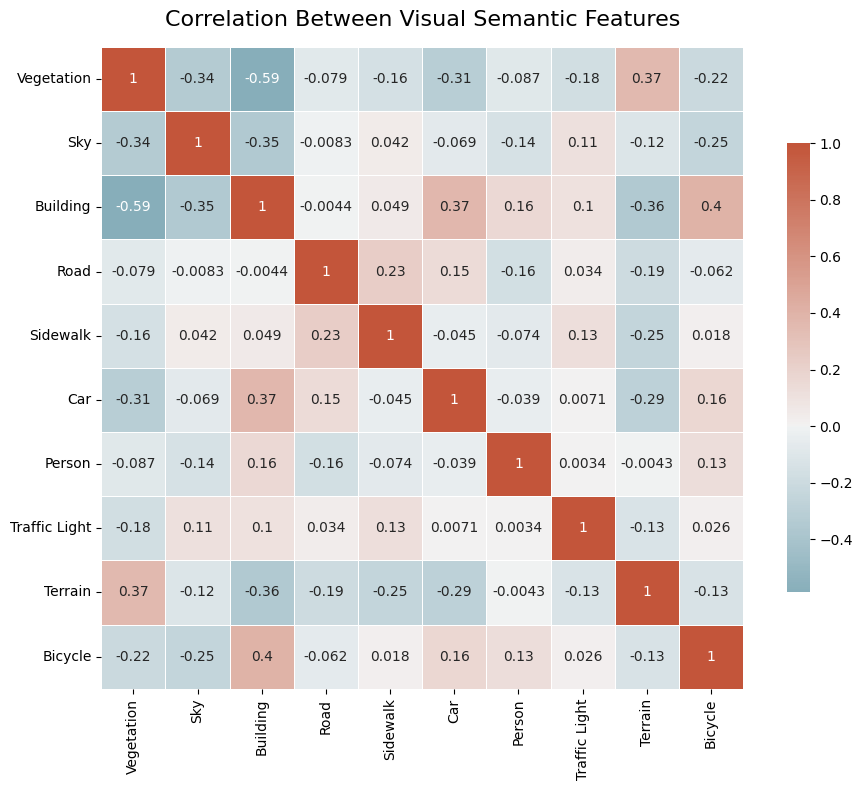

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_features = [
    "Vegetation", "Sky", "Building", "Road",
    "Sidewalk", "Car", "Person", "Traffic Light",
    "Terrain", "Bicycle", 
]

corr = df_mapillary[selected_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    cmap=sns.diverging_palette(220, 20, as_cmap=True),
    center=0,
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.7}
)
plt.title("Correlation Between Visual Semantic Features", fontsize=16, pad=15)
plt.tight_layout()
plt.show()



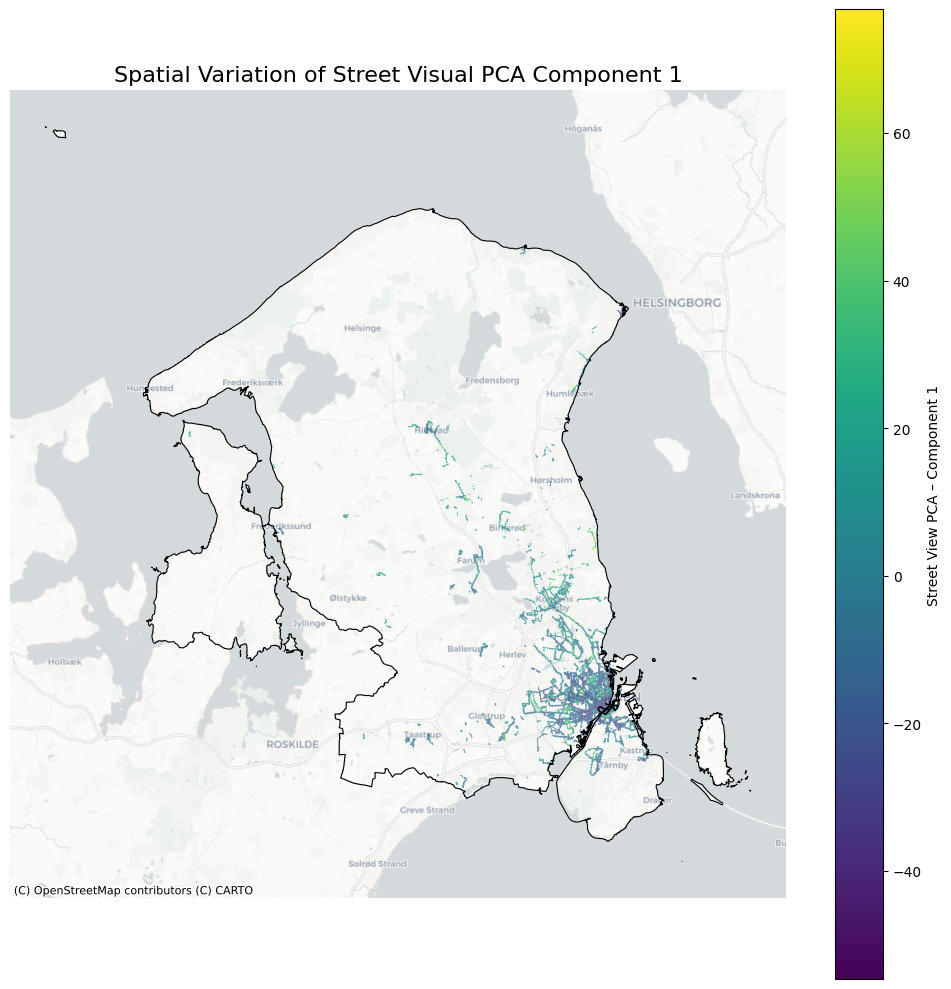

In [27]:
# pca for street visual feature
from sklearn.decomposition import PCA
import numpy as np

pca_features = df_mapillary[selected_features]

pca = PCA(n_components=2)
pcs = pca.fit_transform(pca_features.fillna(0))

df_mapillary["PC1"] = pcs[:,0]
df_mapillary["PC2"] = pcs[:,1]

pca_map = df_mapillary.groupby("GRID_ID")["PC1"].mean().reset_index()
gdf_pca = gdf_grid.merge(pca_map, on="GRID_ID", how="left")

gdf_pca_3857 = gdf_pca.to_crs(epsg=3857)
gdf_boundary_3857 = gdf_boundary.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10,10))
ax.axis("off")
ax.set_aspect("equal")

norm = mpl.colors.Normalize(vmin=gdf_pca["PC1"].min(), vmax=gdf_pca["PC1"].max())

gdf_pca_3857.plot(
    column="PC1",
    cmap="viridis",
    norm=norm,
    edgecolor="none",
    linewidth=0.3,
    ax=ax
)

gdf_boundary_3857.boundary.plot(
    ax=ax,
    facecolor="none",
    color="black",
    linewidth=0.8
)

cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap="viridis"), ax=ax)
cbar.set_label("Street View PCA – Component 1")

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron) # basemap of cph 

plt.title("Spatial Variation of Street Visual PCA Component 1", fontsize=16)
plt.tight_layout()
plt.show()


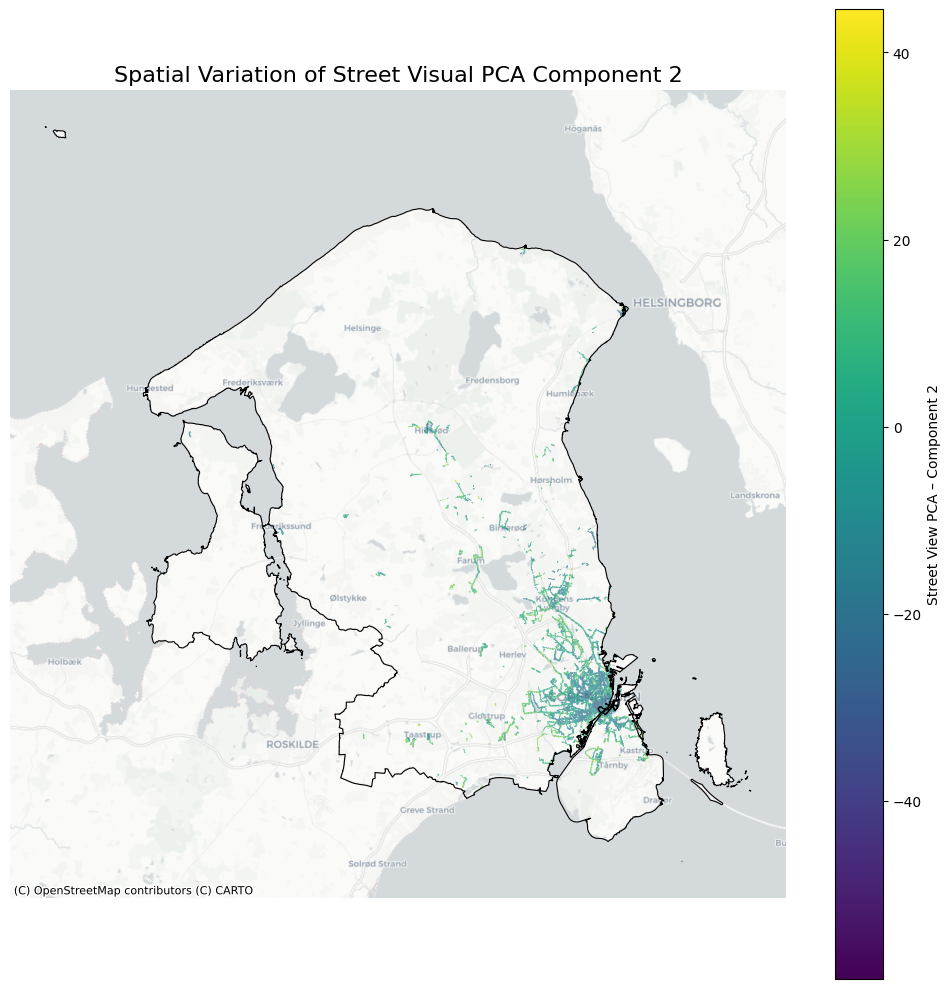

In [34]:
from sklearn.decomposition import PCA
import numpy as np

pca_features = df_mapillary[selected_features]

pca = PCA(n_components=2)
pcs = pca.fit_transform(pca_features.fillna(0))

df_mapillary["PC1"] = pcs[:,0]
df_mapillary["PC2"] = pcs[:,1]

pca_map = df_mapillary.groupby("GRID_ID")["PC2"].mean().reset_index()
gdf_pca = gdf_grid.merge(pca_map, on="GRID_ID", how="left")

gdf_pca_3857 = gdf_pca.to_crs(epsg=3857)
gdf_boundary_3857 = gdf_boundary.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10,10))
ax.axis("off")
ax.set_aspect("equal")

norm = mpl.colors.Normalize(vmin=gdf_pca["PC2"].min(), vmax=gdf_pca["PC2"].max())

gdf_pca_3857.plot(
    column="PC2",
    cmap="viridis",
    norm=norm,
    edgecolor="none",
    linewidth=0.3,
    ax=ax
)

gdf_boundary_3857.boundary.plot(
    ax=ax,
    facecolor="none",
    color="black",
    linewidth=0.8
)

cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap="viridis"), ax=ax)
cbar.set_label("Street View PCA – Component 2")

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron) # basemap of cph 

plt.title("Spatial Variation of Street Visual PCA Component 2", fontsize=16)
plt.tight_layout()
plt.show()

In [28]:
loadings = pd.DataFrame(
    pca.components_.T,
    index=pca_features.columns,
    columns=["PC1", "PC2"]
)

loadings


PC1       PC2
Vegetation     0.827205 -0.203714
Sky           -0.136518  0.823054
Building      -0.526662 -0.528424
Road          -0.032049  0.010106
Sidewalk      -0.004273  0.001657
Car           -0.065900 -0.036947
Person        -0.005970 -0.011751
Traffic Light -0.000817  0.000420
Terrain        0.119112  0.002004
Bicycle       -0.010505 -0.015429

In [29]:
loadings.sort_values("PC1", ascending=False).head(10)


PC1       PC2
Vegetation     0.827205 -0.203714
Terrain        0.119112  0.002004
Traffic Light -0.000817  0.000420
Sidewalk      -0.004273  0.001657
Person        -0.005970 -0.011751
Bicycle       -0.010505 -0.015429
Road          -0.032049  0.010106
Car           -0.065900 -0.036947
Sky           -0.136518  0.823054
Building      -0.526662 -0.528424

In [30]:
loadings.sort_values("PC1", ascending=True).head(10)


PC1       PC2
Building      -0.526662 -0.528424
Sky           -0.136518  0.823054
Car           -0.065900 -0.036947
Road          -0.032049  0.010106
Bicycle       -0.010505 -0.015429
Person        -0.005970 -0.011751
Sidewalk      -0.004273  0.001657
Traffic Light -0.000817  0.000420
Terrain        0.119112  0.002004
Vegetation     0.827205 -0.203714

In [31]:
loadings.sort_values("PC2", ascending=False).head(10)


PC1       PC2
Sky           -0.136518  0.823054
Road          -0.032049  0.010106
Terrain        0.119112  0.002004
Sidewalk      -0.004273  0.001657
Traffic Light -0.000817  0.000420
Person        -0.005970 -0.011751
Bicycle       -0.010505 -0.015429
Car           -0.065900 -0.036947
Vegetation     0.827205 -0.203714
Building      -0.526662 -0.528424

In [32]:
loadings.sort_values("PC2", ascending=True).head(10)


PC1       PC2
Building      -0.526662 -0.528424
Vegetation     0.827205 -0.203714
Car           -0.065900 -0.036947
Bicycle       -0.010505 -0.015429
Person        -0.005970 -0.011751
Traffic Light -0.000817  0.000420
Sidewalk      -0.004273  0.001657
Terrain        0.119112  0.002004
Road          -0.032049  0.010106
Sky           -0.136518  0.823054

PC1 (Green–Urban Axis):
High values reflect natural environments with dominant vegetation and terrain.
Low values reflect built-up environments with buildings, roads, and traffic elements.
This component separates green/natural areas from urban street settings.

PC2 (Openness / Sky Visibility Axis):
High values represent visually open areas with large portions of sky (boulevards, large intersections, open squares).
Low values reflect enclosed environments such as narrow streets, building canyons, or tree-covered areas.